In [110]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        print(self._classes)
        #print(n_classes)
        #calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for idx,c in enumerate(self._classes):
            X_class = X[y == c]
            #print(idx)
            #print(c)
            self._mean[idx, :] = X_class.mean(axis=0)
            self._var[idx, :] = X_class.var(axis=0)
            self._priors[idx] = X_class.shape[0] / float(n_samples)
            #print(self._mean)
    def predict(self, X):
        y_pred = [self.predict_help(x) for x in X]
        return np.array(y_pred)

    def predict_help(self, x):
        posteriors = []

        # calculating posterior probability
        for idx,c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self.Gauss_pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        #print(posteriors)
        #print(np.argmax(posteriors))
        return self._classes[np.argmax(posteriors)]

    def Gauss_pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator




In [111]:
%matplotlib inline
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples =1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
#no_structure = np.random.rand(n_samples, 2)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
#plt.figure(figsize=(9 * 2 + 3, 13))
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,hspace=.01)


plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {})]
#     (no_structure, {})]



Automatically created module for IPython interactive environment


(1200, 2) (300, 2)


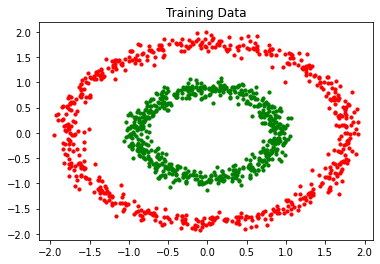

[0 1]


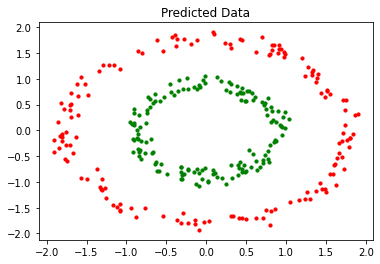

Naive Bayes classification accuracy 1.0
(1200, 2) (300, 2)


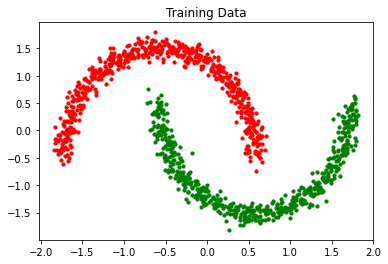

[0 1]


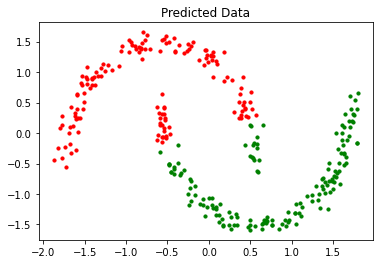

Naive Bayes classification accuracy 0.8666666666666667
(1200, 2) (300, 2)


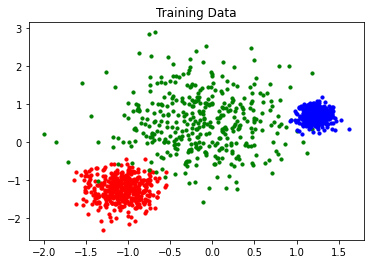

[0 1 2]


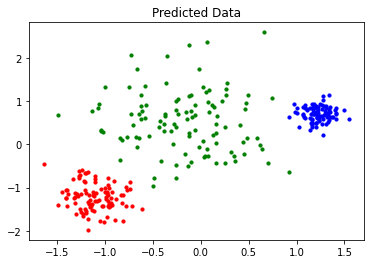

Naive Bayes classification accuracy 0.9833333333333333
(1200, 2) (300, 2)


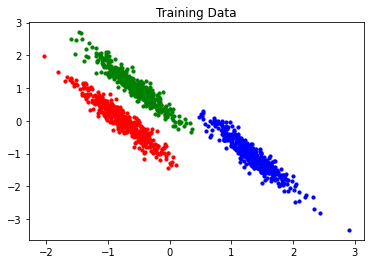

[0 1 2]


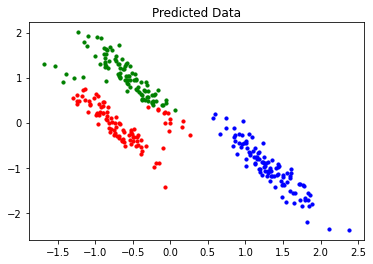

Naive Bayes classification accuracy 0.9366666666666666
(1200, 2) (300, 2)


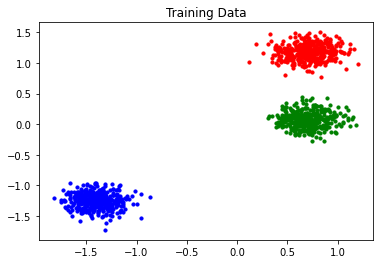

[0 1 2]


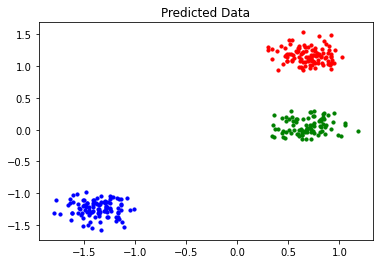

Naive Bayes classification accuracy 1.0


In [113]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    #
    #fig,(ax1,ax2) = plt.subplots(2,2,figsize=(15,15))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print(X_train.shape,X_test.shape)
    
    #plt.subplot(2,2,1)
    
    Xs0=X_train[y_train==0]
    Xs1=X_train[y_train==1]
    Xs2=X_train[y_train==2]
    
    plt.scatter(Xs0.T[0],Xs0.T[1],color='red',marker='o',s=10)
    plt.scatter(Xs1.T[0],Xs1.T[1],color='green',marker='o',s=10)
    plt.scatter(Xs2.T[0],Xs2.T[1],color='blue',marker='o',s=10)
    plt.title('Training Data')
    plt.show()
    
    obj = NaiveBayes()
    obj.fit(X_train, y_train)
    predictions = obj.predict(X_test)
    
    Xsample0=X_test[predictions==0]
    Xsample1=X_test[predictions==1]
    Xsample2=X_test[predictions==2]
    #plt.subplot(2,2,2)
    plt.scatter(Xsample0.T[0],Xsample0.T[1],color='red',marker='o',s=10)
    plt.scatter(Xsample1.T[0],Xsample1.T[1],color='green',marker='o',s=10)
    plt.scatter(Xsample2.T[0],Xsample2.T[1],color='blue',marker='o',s=10)
    plt.title('Predicted Data')
    plt.show()
    print("Naive Bayes classification accuracy", accuracy(y_test, predictions))